In [1]:
import numpy as np#
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict
from tqdm import tqdm 
cmaps = OrderedDict()
cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

In [2]:
amps = np.arange(0.01,1.5,.01)
tot_L = 10
ells = range(1,tot_L)
ps = np.zeros((tot_L, len(amps)))
for indL in tqdm(ells):
    for inda, a in enumerate(amps):
        #ps[indL, inda] = np.load("/data/uab-giq/scratch/matias/dynamo/{}/{}/Ps.npy".format(indL,np.round(a,3)))[0, 100]
        ps[indL, inda] = np.load("/data/uab-giq/scratch/matias/2021/BPSK_dolinar/{}/{}/Ps.npy".format(indL,np.round(a,3)))[0,100]


100%|██████████| 9/9 [00:23<00:00,  2.62s/it]


In [4]:
#tot_L = 10
#ells = range(1,tot_L)
pss = np.zeros((3, len(amps)))
bss = np.zeros((3, len(amps)))

for ii,indL in enumerate([10,20,30]):
    for inda, a in enumerate(amps):
        try:
            pss[ii, inda] = np.load("/data/uab-giq/scratch/matias/2021/BPSK_dolinar/{}/{}/Ps.npy".format(indL,np.round(a,3)))[0,100]
            bss[ii, inda] = np.load("/data/uab-giq/scratch/matias/2021/BPSK_dolinar/{}/{}/Bo.npy".format(indL,np.round(a,3)))[0,100]
            
        except Exception:
            pss[ii, inda] = pss[ii, inda-1]
            bss[ii, inda] = bss[ii, inda-1]
            
                

In [15]:
a = amps[np.argmin(np.abs(amps-0.4))]

bss =  np.load("/data/uab-giq/scratch/matias/2021/BPSK_dolinar/{}/{}/Bo.npy".format(indL,np.round(a,3)))


In [24]:
Npriors=100
etas_min = np.linspace(0,.5,Npriors)
whole_etas = np.concatenate([etas_min, (1-etas_min)[::-1]])

In [31]:
a = amps[np.argmin(np.abs(amps-0.4))]
bss = np.zeros((10, 200))
for ind,indL in enumerate(range(1,10)):
    bss[ind] =  np.load("/data/uab-giq/scratch/matias/2021/BPSK_dolinar/{}/{}/Bo.npy".format(indL,np.round(a,3)))[0]

In [33]:
bss =  np.load("/data/uab-giq/scratch/matias/2021/BPSK_dolinar/{}/{}/Bo.npy".format(10,np.round(a,3)))

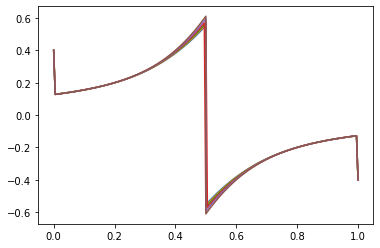

In [42]:
for k in [1,2,3,4, 5, 6]:
    plt.plot(whole_etas,bss[k])

In [28]:
def P_0(eta):
    return np.max([eta, 1-eta])

def Prob(n,alpha,beta):
    p0=0
    p0 +=np.exp(-(alpha+beta)**2)

    if n==0:
        return p0
    else:
        return 1-p0
    
def Prob_Outcome(n, alpha, beta, eta):
    q=0
    for a,et in zip([alpha, -alpha], [eta, 1-eta]):
       q+= et*Prob(n,a,beta)
    return q

def Postirior(n, alpha, beta, eta):
    po = Prob(n, alpha, beta)*eta
    po /= Prob_Outcome(n, alpha, beta, eta)
    return po

def P_1(beta, eta, alpha):
    p=0
    beta = beta[0]
    alpha = alpha[0]
    eta = eta[0]
    for n in [0,1]:
        p+= Prob_Outcome(n, alpha, beta,eta)*P_0(Postirior(n, alpha, beta,eta))
    return 1-p


def P_n(beta, eta,  model, at=1):
    p=0
    for n in [0,1]:
        p+=Prob_Outcome(n, at*alpha, beta, eta)*model(Postirior(n, at*alpha, beta, eta))
    return p

In [136]:
#### sequence of all 0's
prior = whole_etas[100]
N = 10
priors = []
betas = []
enns = np.zeros(10)
for ind,ell in enumerate(range(10)):
    priors.append(prior)
    indprior = np.argmin(np.abs(whole_etas - prior))
    beta =  bss[ell][indprior]
    betas.append(beta)
    prior = Postirior(enns[ind], a/np.sqrt(N),beta, prior)
strat_0 = {"p":priors, "b":betas,"seq":enns}

In [137]:
#### sequence of all 0's
prior = whole_etas[100]
N = 10
priors = []
betas = []
enns = np.ones(10)
for ind,ell in enumerate(range(10)):
    priors.append(prior)
    indprior = np.argmin(np.abs(whole_etas - prior))
    beta =  bss[ell][indprior]
    betas.append(beta)
    prior = Postirior(enns[ind], a/np.sqrt(N),beta, prior)
strat_1 = {"p":priors, "b":betas,"seq":enns}

In [138]:
#### sequence of all 0's
prior = whole_etas[100]
N = 10
priors = []
betas = []
enns = [1, 0, 0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0]
for ind,ell in enumerate(range(10)):
    priors.append(prior)
    indprior = np.argmin(np.abs(whole_etas - prior))
    beta =  bss[ell][indprior]
    betas.append(beta)
    prior = Postirior(enns[ind], a/np.sqrt(N),beta, prior)
strat_1zeros = {"p":priors, "b":betas,"seq":enns}

In [150]:
#### sequence of all 0's
prior = whole_etas[100]
N = 10
priors = []
betas = []
enns = [0, 0, 0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0]
for ind,ell in enumerate(range(10)):
    priors.append(prior)
    indprior = np.argmin(np.abs(whole_etas - prior))
    beta =  bss[ell][indprior]
    betas.append(beta)
    prior = Postirior(enns[ind], a/np.sqrt(N),beta, prior)
strat_1laterzeros = {"p":priors, "b":betas,"seq":enns}

(0.0, 1.0)

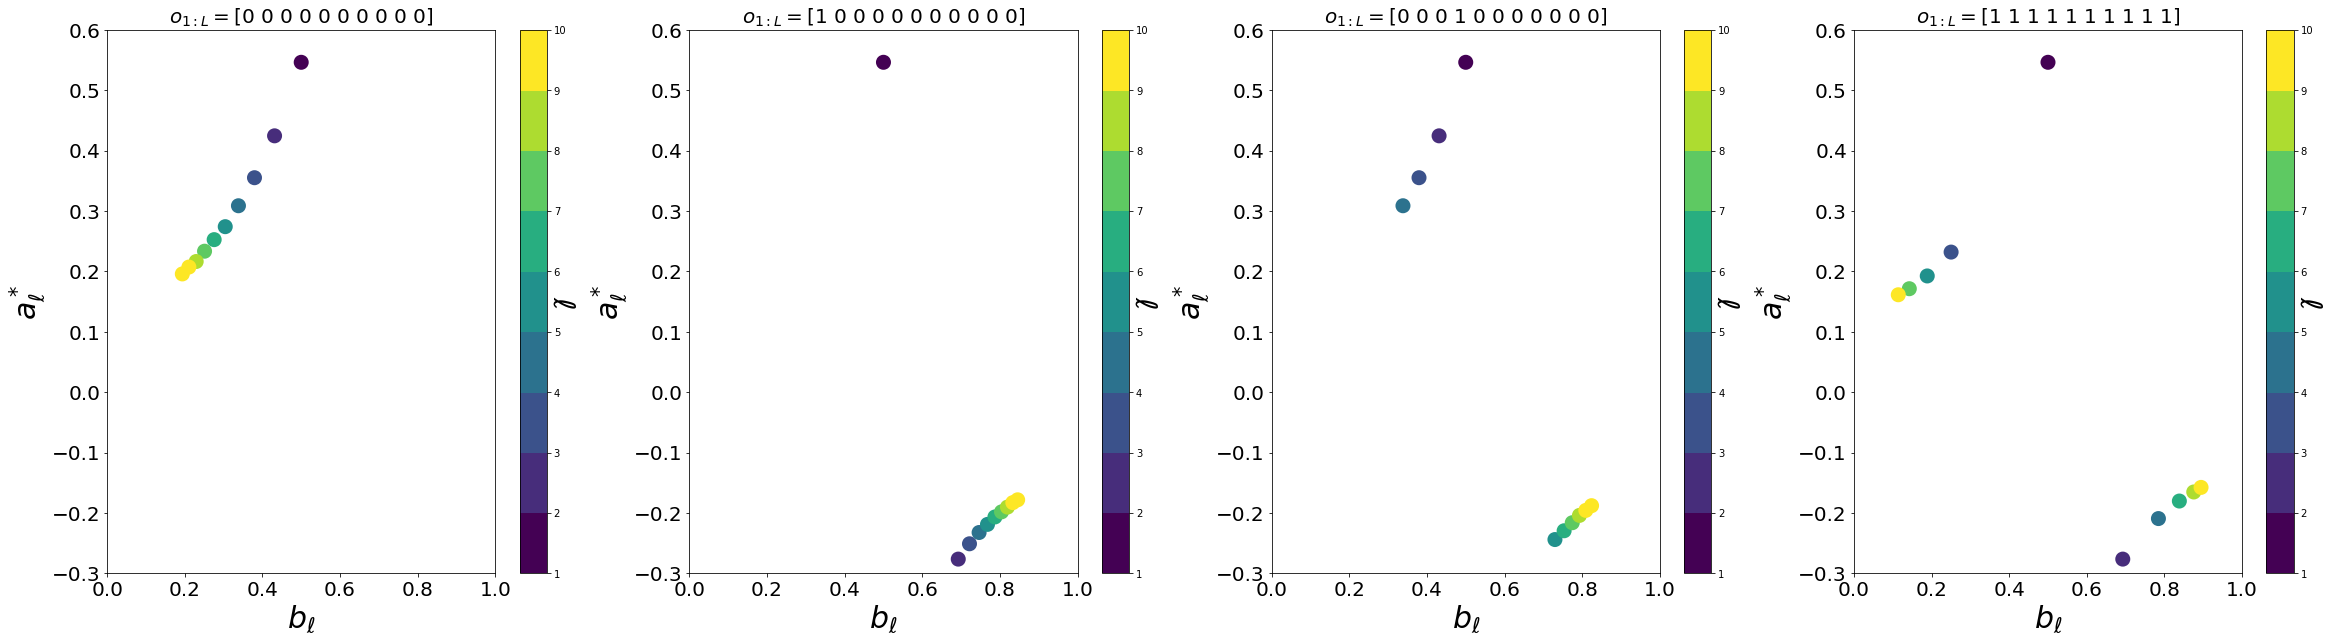

In [159]:
plt.figure(figsize=(40,10))
strat = strat_0
LS=20
lw=5
tra = 1.
ax=plt.subplot(141)
PAD = 10
cm = plt.cm.get_cmap('viridis',9)
sc=ax.scatter(strat["p"], strat["b"],linewidth=lw ,alpha=tra , vmin=1, vmax=10, s=100, c=list(range(1,11)),cmap=cm)
col=plt.colorbar(sc, ticks=list(range(11)))
col.ax.get_yaxis().labelpad = PAD
col.ax.set_ylabel(r'$\ell$', rotation=270, size=int(1.5*LS))
ax.set_xlabel(r'$b_\ell$',size=int(1.5*LS))
ax.set_ylabel(r'$a^*_\ell$',size=int(1.5*LS))
ax.tick_params(axis='both', which='major', labelsize=LS)
ax.tick_params(axis='both', which='minor', labelsize=LS)
ax.set_title(r'$o_{1:L}=$'+str(np.array(strat["seq"]).astype("int")),size=20)
ax.set_ylim([-.3,.6])
ax.set_xlim([0,1.])
ax=plt.subplot(144)
strat = strat_1
cm = plt.cm.get_cmap('viridis',9)
sc=ax.scatter(strat["p"], strat["b"],linewidth=lw ,alpha=tra , vmin=1, vmax=10, s=100, c=list(range(1,11)),cmap=cm)
col=plt.colorbar(sc, ticks=list(range(11)))
col.ax.get_yaxis().labelpad = PAD
col.ax.set_ylabel(r'$\ell$', rotation=270, size=int(1.5*LS))
ax.set_xlabel(r'$b_\ell$',size=int(1.5*LS))
ax.set_ylabel(r'$a^*_\ell$',size=int(1.5*LS))
ax.tick_params(axis='both', which='major', labelsize=LS)
ax.tick_params(axis='both', which='minor', labelsize=LS)
ax.set_title(r'$o_{1:L}=$'+str(np.array(strat["seq"]).astype("int")),size=20)
ax.set_ylim([-.3,.6])
ax.set_xlim([0,1.])
ax=plt.subplot(142)
strat = strat_1zeros
cm = plt.cm.get_cmap('viridis',9)
sc=ax.scatter(strat["p"], strat["b"],linewidth=lw ,alpha=tra , vmin=1, vmax=10, s=100, c=list(range(1,11)),cmap=cm)
col=plt.colorbar(sc, ticks=list(range(11)))
col.ax.get_yaxis().labelpad = PAD
col.ax.set_ylabel(r'$\ell$', rotation=270, size=int(1.5*LS))
ax.set_xlabel(r'$b_\ell$',size=int(1.5*LS))
ax.set_ylabel(r'$a^*_\ell$',size=int(1.5*LS))
ax.tick_params(axis='both', which='major', labelsize=LS)
ax.tick_params(axis='both', which='minor', labelsize=LS)
ax.set_title(r'$o_{1:L}=$'+str(np.array(strat["seq"]).astype("int")),size=20)
ax.set_ylim([-.3,.6])
ax.set_xlim([0,1.])
ax=plt.subplot(143)
strat = strat_1laterzeros
cm = plt.cm.get_cmap('viridis',9)
sc=ax.scatter(strat["p"], strat["b"],linewidth=lw ,alpha=tra , vmin=1, vmax=10, s=100, c=list(range(1,11)),cmap=cm)
col=plt.colorbar(sc, ticks=list(range(11)))
col.ax.get_yaxis().labelpad = PAD
col.ax.set_ylabel(r'$\ell$', rotation=270, size=int(1.5*LS))
ax.set_xlabel(r'$b_\ell$',size=int(1.5*LS))
ax.set_ylabel(r'$a^*_\ell$',size=int(1.5*LS))
ax.tick_params(axis='both', which='major', labelsize=LS)
ax.tick_params(axis='both', which='minor', labelsize=LS)
ax.set_title(r'$o_{1:L}=$'+str(np.array(strat["seq"]).astype("int")),size=20)
ax.set_ylim([-.3,.6])
ax.set_xlim([0,1.])

Text(0.5, 1.0, '$o_{1:L}=$[0 0 0 0 0 0 0 0 0 0]')

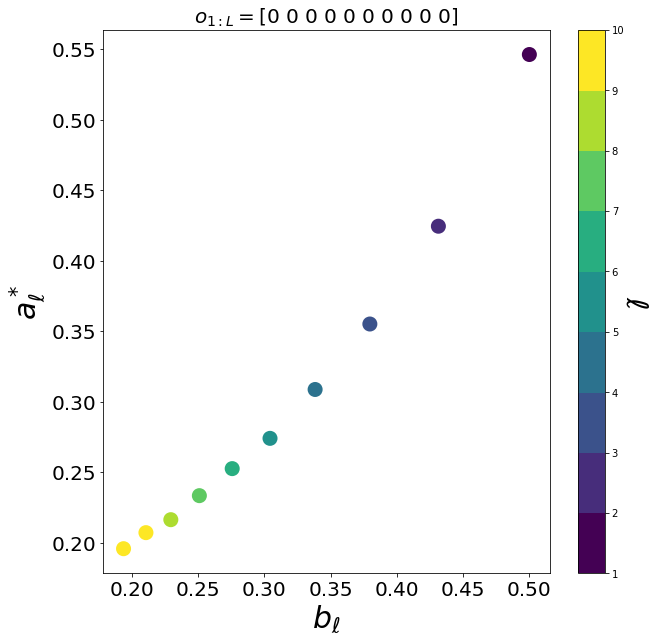

In [140]:
plt.figure(figsize=(10,10))
strat = strat_0
LS=20
lw=5
tra = 1.
ax=plt.subplot()
cm = plt.cm.get_cmap('viridis',9)
sc=ax.scatter(strat["p"], strat["b"],linewidth=lw ,alpha=tra , vmin=1, vmax=10, s=100, c=list(range(1,11)),cmap=cm)
col=plt.colorbar(sc, ticks=list(range(11)))
col.ax.get_yaxis().labelpad = 25
col.ax.set_ylabel(r'$\ell$', rotation=270, size=int(1.5*LS))
ax.set_xlabel(r'$b_\ell$',size=int(1.5*LS))
ax.set_ylabel(r'$a^*_\ell$',size=int(1.5*LS))
ax.tick_params(axis='both', which='major', labelsize=LS)
ax.tick_params(axis='both', which='minor', labelsize=LS)
ax.set_title(r'$o_{1:L}=$'+str(np.array(strat["seq"]).astype("int")),size=20)

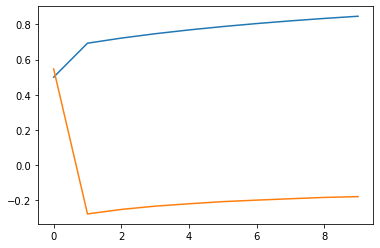

In [64]:
plt.plot(priors)
plt.plot(betas)

In [71]:
#### sequence of all 0's
prior = whole_etas[100]
N = 10
priors = []
betas = []
enns = [1, 0, 0 ,1 ,0 ,0 ,0,0,0,0]
for ind,ell in enumerate(range(10)):
    priors.append(prior)
    indprior = np.argmin(np.abs(whole_etas - prior))
    beta =  bss[ell][indprior]
    betas.append(beta)
    prior = Postirior(enns[ind], a/np.sqrt(N),beta, prior)
strat_1zeros1 = {"p":priors, "b":betas}

In [72]:
priors

[0.5,
 0.6926409965863508,
 0.7215801566509809,
 0.7463592587138594,
 0.21332865198186315,
 0.19632754045092174,
 0.18100257160477978,
 0.16717984026292676,
 0.1547008136965589,
 0.14328024750059562]

In [8]:
def hel(alpha):
    return (1+np.sqrt(1-np.exp(-4*alpha**2)))/2

In [17]:
import os
os.makedirs("data_dp",exist_ok=True)

In [27]:
all_ps = np.concatenate([ps,pss])

In [28]:
np.save("data_dp/ps_upto10_20_30",all_ps)

(3, 149)

Text(0.5, 1.0, 'Dolinar-like receiver for BPSK quantum discrimination of coherent states')

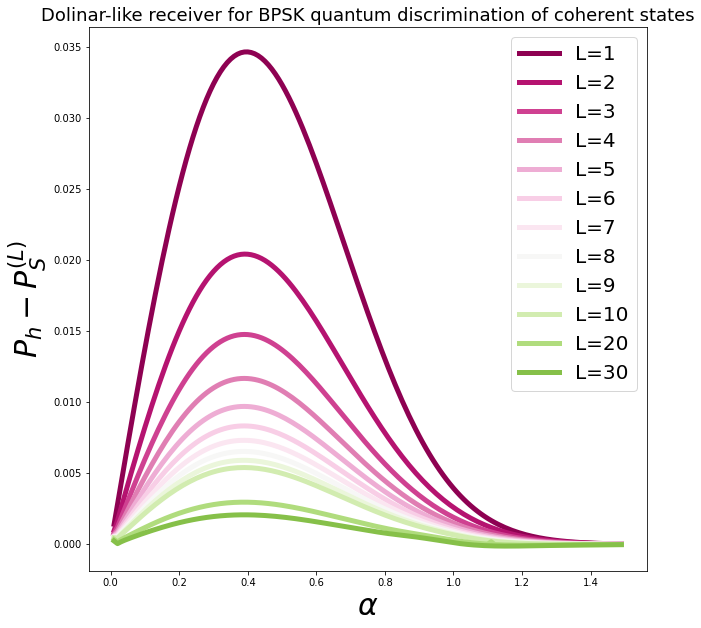

In [13]:
name = "PiYG"
cc=cm.get_cmap(name)
plt.figure(figsize=(10,10))
ax1 = plt.subplot(111)
lw=5
colors = {0:"red",1:"blue",2:"pink",3:"black"}
ind=0
tot=14
for layer in range(1,10):
    ax1.plot(amps,hel(amps) - 1 + ps[layer], label="L="+str(layer), linewidth=lw, color=cc(ind/tot))# color=colors[layer])
    ind+=1
for indl, lay in enumerate([10,20,30]):
    ax1.plot(amps, hel(amps)-1+pss[indl], label="L="+str(lay),linewidth=lw, color=cc(ind/tot))
    ind+=1
#plt.plot(amps,1-hel(amps),'--')
ax1.legend(prop={"size":20})
ax1.set_xlabel(r'$\alpha$',size=30)
ax1.set_ylabel(r'$P_h - P_S^{(L)}$',size=30)
ax1.set_title("Dolinar-like receiver for BPSK quantum discrimination of coherent states",size=18)

#plt.savefig("figures_readme/bpsk_noiseless.png")